In [65]:
import gym
import os
import cv2
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
%matplotlib inline

In [8]:
fig = plt.figure()
env = gym.make('BipedalWalker-v2')
bins = np.random.randn(2, 1, 1, 6, 3)  # action, x, x', theta, theta'

bounds = list(zip(env.observation_space.low, env.observation_space.high))
bounds = np.asarray(bounds)
#num_bins = (1, 1, 6, 3)
bin_size = (bounds[:, 1] - bounds[:, 0]) #/ np.array(num_bins)

num_episodes = 500
MIN_EXPLORE_RATE = 0.01
MIN_LEARNING_RATE = 0.1
discount_factor = .7

total_reward = 0

DEBUG_MODE = False
save_img = True

<Figure size 432x288 with 0 Axes>

In [13]:
def init(env):
    env.render(mode='rgb_array')
    env.reset()
    arr = env.render(mode='rgb_array')
    img = plt.imshow(arr) 
    return img

def animate(env, i, img, save=False, path=None):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    #action = env.action_space.sample()
    #env.step(action)
    arr = env.render(mode='rgb_array')
    img = plt.imshow(arr)
    if save:
        plt.savefig(path)
    return img

## Turn photo frames into a video

In [53]:
image_folder = './walker701'
video_name = 'walker1.avi'
dims = (150, 135)
def photos_to_video(image_folder, video_name, crop=True):
    images = sorted([img for img in os.listdir(image_folder) if img.endswith(".png")], key=lambda x: int(x[4:-4]))
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    if crop:
        frame = frame[80:-40,60:270]
    frame = cv2.resize(frame, dims)
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, 0, 1, (width,height))

    for image in images:
        frame = cv2.imread(os.path.join(image_folder, image))
        if crop:
            frame = frame[80:-40,60:270]
        frame = cv2.resize(frame, dims)
        video.write(frame)

    cv2.destroyAllWindows()
    video.release()

def downsample_photos(image_folder):
    """Crop and downsample photos"""
    images = sorted([img for img in os.listdir(image_folder) if img.endswith(".png")], key=lambda x: int(x[4:-4]))
    for image in images:
        path = os.path.join(image_folder, image)
        frame = cv2.imread(path)
        frame = cv2.resize(frame, dims)
        cv2.imwrite(path, frame)

In [69]:
paths = [1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801, 4001, 4201, 4401, 4601, 4801]
for p in paths:
    downsample_photos("./walker_new{}/".format(p))

(135, 150, 3)


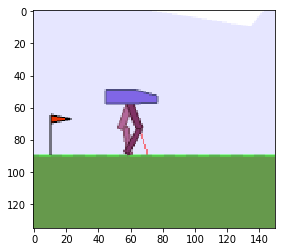

In [59]:
arr = cv2.imread("./walker_new201/img_1.png")
#frame = cv2.resize(arr, (150, 135))
print(arr.shape)
#print(frame.shape)
plt.imshow(arr)

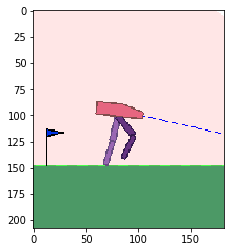

In [32]:
image_folder = './walker1401'
arr = cv2.imread(image_folder + "/img_8.png")[40:-40,130:-120]
plt.imshow(arr)